In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["ps.usedistiller"] = 'xpdf'

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import figurefirst as fifi

In [3]:
from plot_utility import load_real_wind

In [4]:
fififig = '../figures_svg/fig_4_wind.svg'
FONTSIZE = 7

# Load wind

In [5]:
df_stationary_wind_q, zeta, w, t, dt = load_real_wind(wind_type='all')

150000 0.09999990463256836


In [6]:
# Removed for narrative simplicity: shading for drone flight

#df = pandas.read_hdf('../data_experiments/clean_data/botfly_trajectory.hdf')
#drone_t_start = df.original_epoch_time.values[0] - df_stationary_wind_q.time_epoch.values[0]
#drone_t_end = df.original_epoch_time.values[-1] - df_stationary_wind_q.time_epoch.values[0]

# Plot wind

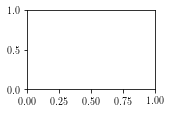

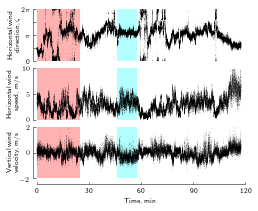

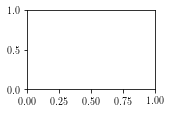

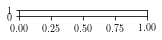

In [7]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

# Wind direction
ax = layout.axes[('wind', 'wind_direction')]

dt = np.mean(np.diff(t))
ax.fill_betweenx([0, 2*np.pi], 0, 15000*dt, facecolor='red', edgecolor='none', alpha=0.3)
ax.fill_betweenx([0, 2*np.pi], 46*60, 7000*dt + 46*60, facecolor='cyan', edgecolor='none', alpha=0.3)
#ax.fill_betweenx([0, 2*np.pi], drone_t_start, drone_t_end, facecolor='forestgreen', edgecolor='none', alpha=0.3)

ax.scatter(t, zeta, c='black', s=0.1, edgecolors='none', rasterized=True)
ax.scatter(t, zeta + 2*np.pi, c='black', s=0.1, edgecolors='none', rasterized=True)

ax.set_ylim(0, 2*np.pi)

xticks = np.array([0, 30, 60, 90, 120])
yticks = [0, np.pi/2., np.pi, 3*np.pi/2, 2*np.pi]
yticklabels = [r'0', '', r'$\pi$', '', r'$2\pi$']
xticklabels = xticks
fifi.mpl_functions.adjust_spines(ax, ['left'], 
                                 xticks=xticks*60, 
                                 yticks=yticks,
                                 spine_locations={'left': 2, 'bottom': 6},
                                 linewidth=0.5,
                                 tick_length=2.5)
ax.set_yticklabels(yticklabels)
ax.set_ylabel('Horizontal wind\ndirection, ' + r'$\zeta$')
ax.yaxis.set_label_coords(-.07, .5)
ax.set_xlim(-60, 120*60)

# Wind speed
ax = layout.axes[('wind', 'wind_speed')]

dt = np.mean(np.diff(t))
ax.fill_betweenx([0, 10], 0, 15000*dt, facecolor='red', edgecolor='none', alpha=0.3)
ax.fill_betweenx([0, 10], 46*60, 7000*dt + 46*60, facecolor='cyan', edgecolor='none', alpha=0.3)
#ax.fill_betweenx([0, 10], drone_t_start, drone_t_end, facecolor='forestgreen', edgecolor='none', alpha=0.3)

ax.scatter(t, df_stationary_wind_q.w, c='black', s=0.1, edgecolors='none', rasterized=True)

ax.set_ylim(0, 10)

xticks = np.array([0, 30, 60, 90, 120])
yticks = [0, 5, 10]
xticklabels = xticks
fifi.mpl_functions.adjust_spines(ax, ['left'], 
                                 xticks=xticks*60, 
                                 yticks=yticks,
                                 spine_locations={'left': 2, 'bottom': 6},
                                 linewidth=0.5,
                                 tick_length=2.5)
ax.set_ylabel('Horizontal wind\nspeed, m/s')
ax.yaxis.set_label_coords(-.07, .5)
ax.set_xlim(-60, 120*60)

# Wind speed vertical
ax = layout.axes[('wind', 'wind_vertical_speed')]

dt = np.mean(np.diff(t))
ax.fill_betweenx([-2, 2], 0, 15000*dt, facecolor='red', edgecolor='none', alpha=0.3)
ax.fill_betweenx([-2, 2], 46*60, 7000*dt + 46*60, facecolor='cyan', edgecolor='none', alpha=0.3)
#ax.fill_betweenx([-2, 2], drone_t_start, drone_t_end, facecolor='forestgreen', edgecolor='none', alpha=0.3)

ax.scatter(t, df_stationary_wind_q.wz, c='black', s=0.1, edgecolors='none', rasterized=True)

ax.set_ylim(-2, 2)
ax.set_xlim(-60, 120*60)

xticks = np.array([0, 30, 60, 90, 120])
yticks = [-2, 0, 2]
yticklabels = [r'0', '', r'$\pi$', '', r'$2\pi$']
xticklabels = xticks
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 xticks=xticks*60, 
                                 yticks=yticks,
                                 spine_locations={'left': 2, 'bottom': 6},
                                 linewidth=0.5,
                                 tick_length=2.5)
ax.set_ylabel('Vertical wind\nvelocity, m/s')
ax.yaxis.set_label_coords(-.07, .5)
ax.set_xticklabels(xticks)
ax.set_xlabel('Time, min')

fifi.mpl_functions.set_fontsize(ax, FONTSIZE)

layout.append_figure_to_layer(layout.figures['wind'], 'wind', cleartarget=True)
layout.write_svg(fififig)